# Chuẩn bị

In [1]:
!pip install ir-evaluation-py

In [2]:
import os
import numpy as np
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import json
import operator
from ir_evaluation.effectiveness import effectiveness
import time
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nife\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nife\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def serialize_sets(obj):
    if isinstance(obj, set):
        return list(obj)
    return obj

Để thuận tiện cho việc đồng bộ và thực thi mô hình, ta cần phải tạo cây thư mục như hình. Với input: "Cranfield/cran" là dữ liệu ban đầu, "Cranfield/RES" là kết quả chuẩn, dùng để kiểm thử và đánh giá, "Cranfield/query.txt" là file query.


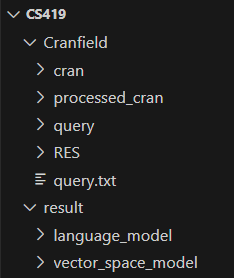

In [4]:
path_project = "E:/Docs/CS419/"

path_cran = path_project + "Cranfield/cran/"
path_processed_cran = path_project +"Cranfield/processed_cran/"

path_res = path_project + "Cranfield/RES/"

path_query_file = path_project + "Cranfield/query.txt"
path_query_folder = path_project + "Cranfield/query/"

path_vector_index = path_project + "vector_index.txt"
path_vector_space_model_result = path_project + "result/vector_space_model/"

path_prob_index = path_project + "prob_index.txt"
path_language_model_result = path_project + "result/language_model/"


## Load dữ liệu

In [5]:
cranfield = []
for i in range(1,1401):
  with open(path_cran + str(i) + ".txt") as f:
    lines = f.readlines()
    cranfield.append(lines)
cranfield

[['experimental investigation of the aerodynamics of a wing in a slipstream . an experimental study of a wing in a propeller slipstream was made in order to determine the spanwise distribution of the lift increase due to slipstream at different angles of attack of the wing and at different free stream to slipstream velocity ratios .  the results were intended in part as an evaluation basis for different theoretical treatments of this problem . the comparative span loading curves, together with supporting evidence, showed that a substantial part of the lift increment produced by the slipstream was due to a /destalling/ or boundary layer control effect .  the integrated remaining lift increment, after subtracting this destalling lift, was found to agree well with a potential flow theory . an empirical evaluation of the destalling effects was made for the specific configuration of the experiment . '],
 ["simple shear flow past a flat plate in an incompressible fluid of small viscosity . i

In [6]:
dic_of_words = {}
num_file = 1
for line in cranfield:
    if line:
        for word in re.sub('[^A-Za-z]+', ' ', line[0]).split():
            if word not in dic_of_words:
                dic_of_words[word] = [num_file]
            else:
                dic_of_words[word].append(num_file)
    num_file+=1

print(len(dic_of_words.keys()))

7047


In [7]:
appear_in_docs = []
times_appear = []
for value in dic_of_words.values():
    appear_in_docs.append(len(set(value)))
    times_appear.append(len(value))

dataF = pd.DataFrame({"word" : dic_of_words.keys(),
                      "times appear" : times_appear,
                      "appear in docs" : appear_in_docs,
                      "list of docs" : dic_of_words.values()})
dataF.to_csv('words.csv', index=False, encoding="utf-8")
dataF

word  times appear  appear in docs  \
0      experimental           423             318   
1     investigation           281             216   
2                of         12671            1394   
3               the         19444            1391   
4      aerodynamics            26              24   
...             ...           ...             ...   
7042    thermometer             1               1   
7043        fralich             1               1   
7044      prevented             1               1   
7045            ing             1               1   
7046             ob             1               1   

                                           list of docs  
0     [1, 1, 11, 12, 17, 19, 25, 29, 30, 35, 41, 42,...  
1     [1, 8, 9, 9, 19, 29, 30, 44, 45, 50, 50, 56, 7...  
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...  
3     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...  
4     [1, 11, 33, 216, 225, 237, 244, 284, 289, 296,...  
...                                                 ...  
7042                                             [1395]  
7043                                             [1396]  
7044                                             [1396]  
7045                                             [1399]  
7046                                             [1400]  

[7047 rows x 4 columns]

In [8]:
res = []
for i in range(1,226):
  with open(path_res + str(i) + ".txt") as f:
    lines = f.readlines()
    res.append(lines)
res

[['1 184\t2\n',
  '1 29\t2\n',
  '1 31\t2\n',
  '1 12\t3\n',
  '1 51\t3\n',
  '1 102\t3\n',
  '1 13\t4\n',
  '1 14\t4\n',
  '1 15\t4\n',
  '1 57\t2\n',
  '1 378\t2\n',
  '1 859\t2\n',
  '1 185\t3\n',
  '1 30\t3\n',
  '1 37\t3\n',
  '1 52\t4\n',
  '1 142\t4\n',
  '1 195\t4\n',
  '1 875\t2\n',
  '1 56\t3\n',
  '1 66\t3\n',
  '1 95\t3\n',
  '1 462\t4\n',
  '1 497\t3\n',
  '1 858\t3\n',
  '1 876\t3\n',
  '1 879\t3\n',
  '1 880\t3\n',
  '1 486\t-1\n'],
 ['2 12\t1\n',
  '2 15\t2\n',
  '2 184\t2\n',
  '2 858\t2\n',
  '2 51\t3\n',
  '2 102\t3\n',
  '2 202\t3\n',
  '2 14\t4\n',
  '2 52\t4\n',
  '2 380\t4\n',
  '2 746\t1\n',
  '2 859\t2\n',
  '2 948\t2\n',
  '2 285\t3\n',
  '2 390\t3\n',
  '2 391\t3\n',
  '2 442\t4\n',
  '2 497\t3\n',
  '2 643\t3\n',
  '2 856\t3\n',
  '2 857\t3\n',
  '2 877\t3\n',
  '2 864\t3\n',
  '2 658\t3\n',
  '2 486\t-1\n'],
 ['3 5\t3\n',
  '3 6\t3\n',
  '3 90\t3\n',
  '3 91\t3\n',
  '3 119\t3\n',
  '3 144\t3\n',
  '3 181\t3\n',
  '3 399\t3\n',
  '3 485\t-1\n'],
 ['4 236\t3

In [9]:
with open(path_query_file) as f:
  lines = f.readlines()
query = lines
query

['1\twhat similarity laws must be obeyed when constructing aeroelastic models of heated high speed aircraft .\n',
 '2\twhat are the structural and aeroelastic problems associated with flight of high speed aircraft .\n',
 '3\twhat problems of heat conduction in composite slabs have been solved so far .\n',
 '4\tcan a criterion be developed to show empirically the validity of flow solutions for chemically reacting gas mixtures based on the simplifying assumption of instantaneous local chemical equilibrium .\n',
 '5\twhat chemical kinetic system is applicable to hypersonic aerodynamic problems .\n',
 '6\twhat theoretical and experimental guides do we have as to turbulent couette flow behaviour .\n',
 '7\tis it possible to relate the available pressure distributions for an ogive forebody at zero angle of attack to the lower surface pressures of an equivalent ogive forebody at angle of attack .\n',
 '8\twhat methods -dash exact or approximate -dash are presently available for predicting bod

## Xử lý dữ liệu

In [10]:
ps = PorterStemmer()
stop_list = stopwords.words('english')
shortword = re.compile(r'\W*\b\w{1,2}\b')

In [11]:
def text_process(content):
    lines = content.lower()
    lines = re.sub('[^A-Za-z]+', ' ', lines)
    tokens = nltk.word_tokenize(lines)
    clean_tokens = [word for word in tokens if word not in stop_list]
    stem_tokens = [ps.stem(word) for word in clean_tokens]
    clean_stem_tokens = [word for word in stem_tokens if word not in stop_list]
    clean_stem_tokens = ' '.join(map(str,  clean_stem_tokens))
    clean_stem_tokens = shortword.sub('', clean_stem_tokens)
    return clean_stem_tokens

In [12]:
# before process
cranfield[7][0]

'measurements of the effect of two dimensional and three dimensional roughness elements on boundary layer transition . in his study of the effect of roughness on transition, h. l. dryden found, on the basis of available data, that the effect of a two dimensional roughness element such as a /trip wire/ could be represented reasonably well in terms of a functional relation between and, where is the reynolds number of transition based on distance from the leading edge, is the height of the roughness element, and is the boundary layer displacement thickness at the position of the element .  at his suggestion some additional data were obtained, primarily to extend the range to higher values of, during the course of an investigation of transition on a flat plate conducted at the national bureau of standards .  after the results on the two  dimensional roughness elements were obtained, it appeared to be desirable to see whether a row of three dimensional roughness elements would behave in the

In [13]:
# after process
text_process(cranfield[0][0])

'experiment investig aerodynam wing slipstream experiment studi wing propel slipstream made order determin spanwis distribut lift increas due slipstream differ angl attack wing differ free stream slipstream veloc ratio result intend part evalu basi differ theoret treatment problem compar span load curv togeth support evid show substanti part lift increment produc slipstream due destal boundari layer control effect integr remain lift increment subtract destal lift found agre well potenti flow theori empir evalu destal effect made specif configur experi'

In [14]:
# process all docs
terms = []
docs = os.listdir(path_cran)
for d in docs:
  with open(path_cran + d, "r") as f1:
    content = f1.read()
    processed_content = text_process(content)
    processed_content_tokens = nltk.word_tokenize(processed_content)
    for token in processed_content_tokens:
      if token not in terms:
        terms.append(token)
    with open(path_processed_cran + d, 'w') as f2:
      f2.write(processed_content)
      f2.close()
    f1.close()

In [15]:
processed_cran_files = os.listdir(path_processed_cran)
len(processed_cran_files)

1400

In [16]:
terms.sort()
terms

['abbrevi',
 'abil',
 'abl',
 'ablat',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'absorpt',
 'abstract',
 'abundantli',
 'academ',
 'acceler',
 'acceleromet',
 'accentu',
 'accept',
 'access',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'account',
 'accru',
 'accumul',
 'accur',
 'accuraci',
 'acet',
 'achiev',
 'ackeret',
 'acoust',
 'acquir',
 'acquisit',
 'acr',
 'acrodynam',
 'across',
 'acrothermochemistri',
 'acrothermoelast',
 'act',
 'action',
 'activ',
 'actual',
 'actur',
 'adam',
 'adapt',
 'add',
 'addendum',
 'addit',
 'adequ',
 'adequaci',
 'adiabat',
 'adjac',
 'adjoin',
 'adjoint',
 'adjust',
 'administr',
 'admiss',
 'admit',
 'admixtur',
 'adopt',
 'adsorpt',
 'advanc',
 'advantag',
 'advent',
 'advers',
 'advisori',
 'advoc',
 'aec',
 'aeolotrop',
 'aerelast',
 'aerfoil',
 'aerial',
 'aero',
 'aeroballist',
 'aerocosmonaut',
 'aerodynam',
 'aerodynamieist',
 'aeroelast',
 'aeroelastician',
 'aerofoil'

In [17]:
num_of_terms = len(terms)
num_of_terms

4197

# Lập chỉ mục

## Mô hình không gian vector

In [18]:
def create_vector_index(path):
  inverted_index = {}
  docs = os.listdir(path)
  num_of_docs = len(docs)
  for d in docs:
    f = open(path + d, "r")
    content = f.read()
    f.close()
    id = d.split(".")[0]
    tokens = nltk.word_tokenize(content)
    for token in tokens:
      if token not in inverted_index:
        inverted_index[token] = {}
      if id not in inverted_index[token]:
        inverted_index[token][id] = 1
      else:
        inverted_index[token][id] += 1

  doc = {}
  for term in inverted_index:
    idf = np.log10(num_of_docs/len(inverted_index[term]))
    for id in inverted_index[term]:
      if id not in doc:
        doc[id] = []
      inverted_index[term][id] = (1 + np.log10(inverted_index[term][id])) * idf
      doc[id].append(inverted_index[term][id])

  doc_norm = {}
  for id in doc:
      sqr = np.square(doc[id])
      sum_sqr = np.sum(sqr)
      norm = np.sqrt(sum_sqr)
      doc_norm[id] = norm
  for term in inverted_index:
      for id in inverted_index[term]:
          inverted_index[term][id] = inverted_index[term][id]/doc_norm[id]
  return inverted_index

In [19]:
start_time = time.time()
vector_index = create_vector_index(path_processed_cran)
end_time = time.time()
f = open(path_project + "vector_index.txt", "w")
f.write(json.dumps(vector_index))
f.close()
print("Thời gian lập chỉ mục: ", end_time - start_time)

Thời gian lập chỉ mục:  11.812658071517944


## Mô hình xác suất


In [20]:
def create_prob_index(path):
    inverted_index = {}
    doc_len = {}
    dir = os.listdir(path)
    L_c = 0
    for d in dir:
        id = d.split('.')[0]
        f = open(path + d, 'r')
        content = f.read()
        f.close()
        tokens = nltk.word_tokenize(content)
        doc_length = len(tokens)
        doc_len[id] = doc_length
        L_c += doc_length
        for token in tokens:
            if token not in inverted_index:
                inverted_index[token] = {}
                inverted_index[token]['all'] = 0
            if id not in inverted_index[token]:
                inverted_index[token][id] = 1
            else: inverted_index[token][id] += 1
            inverted_index[token]['all'] += 1
    for term in inverted_index:
        inverted_index[term]['all'] =  inverted_index[term]['all']/L_c
        for id in inverted_index[term]:
            if id == 'all':
                continue
            inverted_index[term][id] = inverted_index[term][id]/doc_len[id]
    return inverted_index

In [21]:
start_time = time.time()
prob_index = create_prob_index(path_processed_cran)
end_time = time.time()
f = open(path_project + "prob_index.txt", "w")
f.write(json.dumps(prob_index))
f.close()
print("Thời gian lập chỉ mục: ", end_time - start_time)

Thời gian lập chỉ mục:  0.6977362632751465


# Truy xuất

## Mô hình không gian vector

In [22]:
# load vector_index
def load_index(path):
  f = open(path, "r")
  content = f.read()
  index = json.loads(content)
  return index

In [23]:
vector_index = load_index(path_vector_index)
vector_index

{'experiment': {'1': 0.07524458092364351,
  '1006': 0.08509877930402321,
  '1008': 0.0708157045684241,
  '101': 0.038410444598391616,
  '1016': 0.0590219850632934,
  '1019': 0.06622681917425284,
  '1028': 0.046421710774747924,
  '103': 0.04711983875914927,
  '1039': 0.07101252453190826,
  '1040': 0.03040728106354168,
  '1045': 0.15764559266420558,
  '1046': 0.08769135297189,
  '1049': 0.09430300013165856,
  '1051': 0.045210388463333896,
  '1062': 0.10816255127851106,
  '1066': 0.06476904823532488,
  '1069': 0.07284199090929822,
  '1070': 0.0659511730064123,
  '1074': 0.09498240841151066,
  '1075': 0.07278270928532143,
  '1076': 0.10542729169440247,
  '1078': 0.07072425236948826,
  '1080': 0.06581709607212295,
  '1081': 0.06502694777389119,
  '1082': 0.044012152953678246,
  '1083': 0.09634730103163439,
  '1092': 0.03941014334672633,
  '1097': 0.0467806504431647,
  '1098': 0.05352632659956279,
  '11': 0.05941727955131704,
  '1110': 0.055714760844943215,
  '1112': 0.06266474662875499,
  '

In [24]:
# split query file
with open(path_query_file) as f1:
  lines = f1.readlines()
querys = lines
for query in querys:
  qr = re.sub("\n", "", query)
  qr_id = qr.split("\t")[0]
  qr_content = qr.split("\t")[1]
  with open(path_query_folder + str(qr_id) + ".txt", "w") as f2:
    f2.write(qr_content)
print(os.listdir(path_query_folder))

['1.txt', '10.txt', '100.txt', '101.txt', '102.txt', '103.txt', '104.txt', '105.txt', '106.txt', '107.txt', '108.txt', '109.txt', '11.txt', '110.txt', '111.txt', '112.txt', '113.txt', '114.txt', '115.txt', '116.txt', '117.txt', '118.txt', '119.txt', '12.txt', '120.txt', '121.txt', '122.txt', '123.txt', '124.txt', '125.txt', '126.txt', '127.txt', '128.txt', '129.txt', '13.txt', '130.txt', '131.txt', '132.txt', '133.txt', '134.txt', '135.txt', '136.txt', '137.txt', '138.txt', '139.txt', '14.txt', '140.txt', '141.txt', '142.txt', '143.txt', '144.txt', '145.txt', '146.txt', '147.txt', '148.txt', '149.txt', '15.txt', '150.txt', '151.txt', '152.txt', '153.txt', '154.txt', '155.txt', '156.txt', '157.txt', '158.txt', '159.txt', '16.txt', '160.txt', '161.txt', '162.txt', '163.txt', '164.txt', '165.txt', '166.txt', '167.txt', '168.txt', '169.txt', '17.txt', '170.txt', '171.txt', '172.txt', '173.txt', '174.txt', '175.txt', '176.txt', '177.txt', '178.txt', '179.txt', '18.txt', '180.txt', '181.txt'

In [25]:
# retrieve
def vector_space_retrieve(query, index):
  result = {}
  qr = text_process(query)
  qr_tokens = nltk.word_tokenize(qr)
  for token in qr_tokens:
    if token not in index:
      continue
    for doc_id in index[token]:
      if doc_id not in result:
        result[doc_id] = index[token][doc_id]
      else:
        result[doc_id] += index[token][doc_id]
  ranked_list = dict(sorted(result.items(), key=operator.itemgetter(1), reverse=True))
  return list(ranked_list.keys())

In [26]:
query_files = os.listdir(path_query_folder)
start_time = time.time()
for query in query_files:
  with open(path_query_folder + query, "r") as f1:
    qr = f1.read()
  result = vector_space_retrieve(qr, vector_index)
  with open(path_vector_space_model_result + query, "w") as f2:
    f2.write(json.dumps(result))
  # print(query, result)
end_time = time.time()
print("Thời gian truy xuất: ", end_time - start_time)

Thời gian truy xuất:  1.9917421340942383


In [27]:
query_test = 'the aerodynamic performance transfer to a blunt body'
start_time = time.time()
result_t = vector_space_retrieve(query_test, vector_index)
end_time = time.time()
print("time: ", end_time - start_time, result_t)

time:  0.0 ['438', '559', '655', '670', '1161', '666', '142', '1393', '999', '295', '36', '1006', '44', '599', '983', '1104', '283', '708', '1213', '1002', '688', '1274', '369', '979', '1107', '1319', '1263', '329', '553', '372', '1394', '1005', '77', '1106', '1074', '1001', '391', '294', '161', '925', '354', '816', '273', '590', '981', '1237', '634', '544', '650', '1112', '592', '93', '318', '101', '120', '84', '815', '523', '537', '625', '543', '689', '759', '536', '493', '1307', '1197', '662', '576', '421', '809', '572', '1204', '35', '410', '435', '1151', '66', '332', '861', '947', '211', '566', '272', '606', '323', '1391', '578', '626', '978', '994', '1241', '1300', '1253', '1377', '215', '1105', '20', '1281', '398', '11', '801', '137', '1379', '982', '1066', '154', '813', '1098', '1157', '1305', '508', '556', '554', '546', '360', '687', '25', '172', '79', '37', '1378', '1179', '325', '1318', '661', '1259', '946', '597', '501', '1040', '370', '575', '1198', '29', '541', '1352', '7

## Mô hình xác suất

In [28]:
# load vector_index
def load_index(path):
  f = open(path, "r")
  content = f.read()
  index = json.loads(content)
  return index

In [29]:
prob_index = load_index(path_prob_index)
prob_index

{'experiment': {'all': 0.003686476904614371,
  '1': 0.02531645569620253,
  '1006': 0.01818181818181818,
  '1008': 0.0196078431372549,
  '101': 0.005263157894736842,
  '1016': 0.0196078431372549,
  '1019': 0.02158273381294964,
  '1028': 0.009523809523809525,
  '103': 0.014285714285714285,
  '1039': 0.019230769230769232,
  '1040': 0.0034602076124567475,
  '1045': 0.06666666666666667,
  '1046': 0.02127659574468085,
  '1049': 0.045454545454545456,
  '1051': 0.0078125,
  '1062': 0.03508771929824561,
  '1066': 0.02072538860103627,
  '1069': 0.029411764705882353,
  '1070': 0.014925373134328358,
  '1074': 0.02127659574468085,
  '1075': 0.016260162601626018,
  '1076': 0.017543859649122806,
  '1078': 0.012987012987012988,
  '1080': 0.016129032258064516,
  '1081': 0.015873015873015872,
  '1082': 0.006622516556291391,
  '1083': 0.022727272727272728,
  '1092': 0.006172839506172839,
  '1097': 0.014084507042253521,
  '1098': 0.011494252873563218,
  '11': 0.01639344262295082,
  '1110': 0.0121951219512

In [30]:
def query_likelihood_retrieve(qry, index, l=0.5):
    rst = {}
    tokens = nltk.word_tokenize(qry)
    token_in = []
    for token in tokens:
        if token not in index:
            continue
        token_in.append(token)
        for doc_id in index[token]:
            if doc_id == 'all':
                continue
            rst[doc_id] = 0
    for id in rst:
        for token in token_in:
            if index[token].get(id) is None:
                rst[id] += np.log10((1-l)*index[token]['all'])
            else: rst[id] += np.log10(l*index[token][id] + (1-l)*index[token]['all'])
    ranked_list = dict(sorted(rst.items(), key=operator.itemgetter(1),reverse=True))
    return list(ranked_list.keys())

In [31]:
query_files = os.listdir(path_query_folder)
start_time = time.time()
for query in query_files:
  with open(path_query_folder + query, "r") as f1:
    qr = f1.read()
    qr = text_process(qr)
  result = query_likelihood_retrieve(qr, prob_index, l=0.5)
  with open(path_language_model_result + query, "w") as f2:
    f2.write(json.dumps(result))
  # print(query, result)
end_time = time.time()
print("Thời gian truy xuất: ", end_time - start_time)

Thời gian truy xuất:  3.327303886413574


# Đánh giá

## Mô hình không gian vector

In [32]:
ir = effectiveness()
interactions = {}
res_files = os.listdir(path_res)
for file_name in res_files:
  with open(path_res + file_name, 'r') as f:
    lines = f.readlines()
    for line in lines:
        qr_id_doc_id, _ = line.split("\t")
        qr_id, doc_id = qr_id_doc_id.split()
        if interactions.get(qr_id) is None:
            interactions[qr_id] = {}
        if interactions[qr_id].get('related_documents') is None:
            interactions[qr_id]['related_documents'] = set()
        interactions[qr_id]['related_documents'].add(doc_id)

In [33]:
dir = os.listdir(path_vector_space_model_result)
for d in dir:
    qr_id = d.split('.')[0]
    f = open(path_vector_space_model_result + d, 'r')
    content = f.read()
    f.close()
    result_list = json.loads(content)
    interactions[qr_id]['total_result'] = len(result_list)
    for i in range(len(result_list)):
        if result_list[i] in interactions[qr_id]['related_documents']:
            if interactions[qr_id].get('visited_documents') is None:
                interactions[qr_id]['visited_documents'] = []
            interactions[qr_id]['visited_documents'].append(result_list[i])
            if interactions[qr_id].get('visited_documents_orders') is None:
                interactions[qr_id]['visited_documents_orders'] = {}
            interactions[qr_id]['visited_documents_orders'][result_list[i]] = i+1

In [34]:
for qr_id in interactions:
    if interactions[qr_id].get('total_result') is None:
        interactions[qr_id]['total_result'] =  '0'
    if interactions[qr_id].get('visited_documents') is None:
        interactions[qr_id]['visited_documents'] = []
    if interactions[qr_id].get('visited_documents_orders') is None:
        interactions[qr_id]['visited_documents_orders'] = {}

In [35]:
print("Mean Average Precision:")
mean_ap = ir.mean_ap(interactions,['all'])
print(mean_ap)

Mean Average Precision:
{'all': {'count': 225, 'value': 0.3869408010524326}}


In [36]:
print("Interpolated Average Precision:")
print("Recall : Precision")
iap = ir.iap(interactions)
for key in iap:
    print(key, ':', iap[key])

Interpolated Average Precision:
Recall : Precision
0.0 : 0.786135919343814
0.1 : 0.7512610302073215
0.2 : 0.6391467009495003
0.3 : 0.5329488259116699
0.4 : 0.4516678316057228
0.5 : 0.3867161661330794
0.6 : 0.2971281366563085
0.7 : 0.22093696089381865
0.8 : 0.1809546891257414
0.9 : 0.1306830379384605
1.0 : 0.1151199372091726


In [37]:
dir = os.listdir(path_vector_space_model_result)
for d in dir:
    qr_id = d.split('.')[0]
    f = open(path_vector_space_model_result + d, 'r')
    content = f.read()
    f.close()
    result_list = json.loads(content)
    print(d, result_list)

1.txt ['51', '878', '573', '486', '879', '184', '12', '665', '944', '663', '435', '1003', '13', '141', '359', '329', '746', '1263', '1361', '305', '378', '876', '56', '1186', '78', '332', '747', '875', '629', '453', '1155', '429', '14', '252', '584', '1335', '293', '1158', '526', '195', '606', '1268', '1338', '104', '29', '685', '925', '430', '1340', '1328', '1305', '172', '576', '102', '280', '1300', '495', '414', '240', '219', '1198', '729', '491', '283', '328', '204', '374', '345', '592', '1149', '142', '306', '781', '719', '251', '670', '2', '202', '25', '982', '1042', '1111', '160', '300', '1034', '101', '726', '311', '1246', '601', '1163', '817', '309', '497', '1147', '364', '811', '1063', '1144', '50', '655', '493', '1194', '1074', '1048', '315', '253', '681', '638', '302', '540', '180', '354', '707', '438', '1191', '880', '1101', '216', '792', '572', '1315', '481', '120', '1110', '316', '84', '588', '1212', '585', '1219', '23', '546', '799', '871', '1236', '630', '795', '884', 

In [38]:
res_files = os.listdir(path_res)
list_precision = []
list_recall = []
list_f1score = []
for file_name in res_files:
  print(file_name)
  with open(path_res + file_name, 'r') as f:
    lines = f.readlines()
    res_list = []
    for line in lines:
        qr_id_doc_id, _ = line.split("\t")
        qr_id, doc_id = qr_id_doc_id.split()
        res_list.append(doc_id)
  f = open(path_vector_space_model_result + file_name, 'r')
  content = f.read()
  f.close()
  result_list = json.loads(content)
  count_true = 0.0
  for res_doc in res_list:
    if res_doc in result_list:
      count_true += 1
  if count_true != 0:
    precision = count_true / len(result_list)
    recall = count_true / len(res_list)
  else:
    precision = 0
    recall = 0
  if precision != 0 and recall != 0:
    f1score = (2 * precision * recall) / (precision + recall)
  else:
    f1score = 0
  list_precision.append(precision)
  list_recall.append(recall)
  list_f1score.append(f1score)
  
print("Trung bình Precision: ", np.mean(list_precision))
print("Trung bình Recall: ", np.mean(list_recall))
print("Trung bình F1-Score: ", np.mean(list_f1score))

1.txt
10.txt
100.txt
101.txt
102.txt
103.txt
104.txt
105.txt
106.txt
107.txt
108.txt
109.txt
11.txt
110.txt
111.txt
112.txt
113.txt
114.txt
115.txt
116.txt
117.txt
118.txt
119.txt
12.txt
120.txt
121.txt
122.txt
123.txt
124.txt
125.txt
126.txt
127.txt
128.txt
129.txt
13.txt
130.txt
131.txt
132.txt
133.txt
134.txt
135.txt
136.txt
137.txt
138.txt
139.txt
14.txt
140.txt
141.txt
142.txt
143.txt
144.txt
145.txt
146.txt
147.txt
148.txt
149.txt
15.txt
150.txt
151.txt
152.txt
153.txt
154.txt
155.txt
156.txt
157.txt
158.txt
159.txt
16.txt
160.txt
161.txt
162.txt
163.txt
164.txt
165.txt
166.txt
167.txt
168.txt
169.txt
17.txt
170.txt
171.txt
172.txt
173.txt
174.txt
175.txt
176.txt
177.txt
178.txt
179.txt
18.txt
180.txt
181.txt
182.txt
183.txt
184.txt
185.txt
186.txt
187.txt
188.txt
189.txt
19.txt
190.txt
191.txt
192.txt
193.txt
194.txt
195.txt
196.txt
197.txt
198.txt
199.txt
2.txt
20.txt
200.txt
201.txt
202.txt
203.txt
204.txt
205.txt
206.txt
207.txt
208.txt
209.txt
21.txt
210.txt
211.txt
212.txt


## Mô hình xác suất

In [39]:
ir = effectiveness()
interactions = {}
res_files = os.listdir(path_res)
for file_name in res_files:
  with open(path_res + file_name, 'r') as f:
    lines = f.readlines()
    for line in lines:
        qr_id_doc_id, _ = line.split("\t")
        qr_id, doc_id = qr_id_doc_id.split()
        if interactions.get(qr_id) is None:
            interactions[qr_id] = {}
        if interactions[qr_id].get('related_documents') is None:
            interactions[qr_id]['related_documents'] = set()
        interactions[qr_id]['related_documents'].add(doc_id)

In [40]:
dir = os.listdir(path_language_model_result)
for d in dir:
    qr_id = d.split('.')[0]
    f = open(path_language_model_result + d, 'r')
    content = f.read()
    f.close()
    result_list = json.loads(content)
    interactions[qr_id]['total_result'] = len(result_list)
    for i in range(len(result_list)):
        if result_list[i] in interactions[qr_id]['related_documents']:
            if interactions[qr_id].get('visited_documents') is None:
                interactions[qr_id]['visited_documents'] = []
            interactions[qr_id]['visited_documents'].append(result_list[i])
            if interactions[qr_id].get('visited_documents_orders') is None:
                interactions[qr_id]['visited_documents_orders'] = {}
            interactions[qr_id]['visited_documents_orders'][result_list[i]] = i+1

In [41]:
for qr_id in interactions:
    if interactions[qr_id].get('total_result') is None:
        interactions[qr_id]['total_result'] =  '0'
    if interactions[qr_id].get('visited_documents') is None:
        interactions[qr_id]['visited_documents'] = []
    if interactions[qr_id].get('visited_documents_orders') is None:
        interactions[qr_id]['visited_documents_orders'] = {}

In [42]:
print("Mean Average Precision:")
mean_ap = ir.mean_ap(interactions,['all'])
print(mean_ap)

Mean Average Precision:
{'all': {'count': 225, 'value': 0.4055744883873477}}


In [43]:
print("Interpolated Average Precision:")
print("Recall : Precision")
iap = ir.iap(interactions)
for key in iap:
    print(key, ':', iap[key])

Interpolated Average Precision:
Recall : Precision
0.0 : 0.8344000289198263
0.1 : 0.8006503280034589
0.2 : 0.6864603822848973
0.3 : 0.5546553429275187
0.4 : 0.44941784972254767
0.5 : 0.38872481837285666
0.6 : 0.31134956981715917
0.7 : 0.2316352214379578
0.8 : 0.18909588256145174
0.9 : 0.1348359056167453
1.0 : 0.11849026660799579


In [44]:
dir = os.listdir(path_language_model_result)
for d in dir:
    qr_id = d.split('.')[0]
    f = open(path_language_model_result + d, 'r')
    content = f.read()
    f.close()
    result_list = json.loads(content)
    print(d, result_list)

1.txt ['51', '486', '573', '12', '878', '184', '665', '944', '879', '141', '329', '78', '746', '747', '1361', '13', '14', '1003', '453', '663', '172', '876', '435', '219', '1268', '374', '252', '359', '875', '1263', '685', '414', '576', '202', '729', '293', '1340', '195', '378', '1194', '1335', '332', '640', '526', '1338', '1328', '56', '1144', '792', '1186', '629', '104', '280', '719', '1147', '588', '429', '982', '1305', '1155', '1034', '25', '606', '1158', '216', '305', '707', '29', '220', '874', '430', '491', '328', '253', '925', '781', '592', '1042', '601', '1169', '283', '584', '101', '345', '240', '726', '102', '1101', '315', '1246', '142', '204', '2', '799', '1219', '1300', '811', '658', '251', '302', '871', '917', '481', '495', '908', '1163', '309', '1181', '316', '578', '1111', '711', '1063', '300', '1113', '214', '209', '1380', '1110', '585', '681', '502', '1212', '529', '1125', '717', '638', '311', '395', '415', '235', '103', '33', '1184', '1315', '165', '493', '1089', '92'

In [45]:
res_files = os.listdir(path_res)
list_precision = []
list_recall = []
list_f1score = []
for file_name in res_files:
  print(file_name)
  with open(path_res + file_name, 'r') as f:
    lines = f.readlines()
    res_list = []
    for line in lines:
        qr_id_doc_id, _ = line.split("\t")
        qr_id, doc_id = qr_id_doc_id.split()
        res_list.append(doc_id)
  f = open(path_language_model_result + file_name, 'r')
  content = f.read()
  f.close()
  result_list = json.loads(content)
  count_true = 0.0
  for res_doc in res_list:
    if res_doc in result_list:
      count_true += 1
  if count_true != 0:
    precision = count_true / len(result_list)
    recall = count_true / len(res_list)
  else:
    precision = 0
    recall = 0
  if precision != 0 and recall != 0:
    f1score = (2 * precision * recall) / (precision + recall)
  else:
    f1score = 0
  list_precision.append(precision)
  list_recall.append(recall)
  list_f1score.append(f1score)

print("Trung bình Precision: ", np.mean(list_precision))
print("Trung bình Recall: ", np.mean(list_recall))
print("Trung bình F1-Score: ", np.mean(list_f1score))

1.txt
10.txt
100.txt
101.txt
102.txt
103.txt
104.txt
105.txt
106.txt
107.txt
108.txt
109.txt
11.txt
110.txt
111.txt
112.txt
113.txt
114.txt
115.txt
116.txt
117.txt
118.txt
119.txt
12.txt
120.txt
121.txt
122.txt
123.txt
124.txt
125.txt
126.txt
127.txt
128.txt
129.txt
13.txt
130.txt
131.txt
132.txt
133.txt
134.txt
135.txt
136.txt
137.txt
138.txt
139.txt
14.txt
140.txt
141.txt
142.txt
143.txt
144.txt
145.txt
146.txt
147.txt
148.txt
149.txt
15.txt
150.txt
151.txt
152.txt
153.txt
154.txt
155.txt
156.txt
157.txt
158.txt
159.txt
16.txt
160.txt
161.txt
162.txt
163.txt
164.txt
165.txt
166.txt
167.txt
168.txt
169.txt
17.txt
170.txt
171.txt
172.txt
173.txt
174.txt
175.txt
176.txt
177.txt
178.txt
179.txt
18.txt
180.txt
181.txt
182.txt
183.txt
184.txt
185.txt
186.txt
187.txt
188.txt
189.txt
19.txt
190.txt
191.txt
192.txt
193.txt
194.txt
195.txt
196.txt
197.txt
198.txt
199.txt
2.txt
20.txt
200.txt
201.txt
202.txt
203.txt
204.txt
205.txt
206.txt
207.txt
208.txt
209.txt
21.txt
210.txt
211.txt
212.txt
